## 引用函式庫



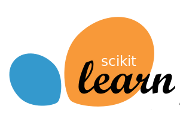

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

## 讀取全部資料集

In [3]:
from google.colab import widgets ## 用於製作以下的 tab 標籤輸出

data = load_iris(as_frame = True) ## 讀取資料集
inputs = data.data[['sepal length (cm)', 'sepal width (cm)']]
# inputs['target'] = data.target
labels = data.target

tb = widgets.TabBar(['input data', 'labels'])
with tb.output_to(0):
  display(inputs)
with tb.output_to(1):
  display(labels)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

<IPython.core.display.Javascript object>

## 資料集資訊集可視化

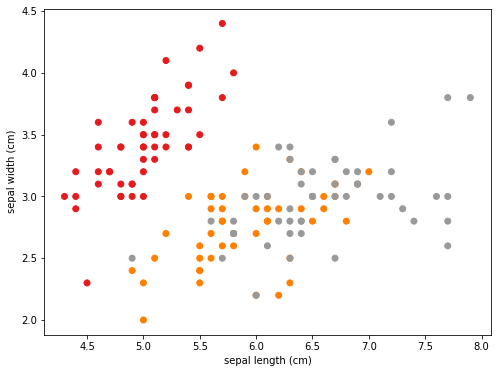

In [ ]:
## 以前兩個維度繪製資料點
fig = plt.figure(figsize=(8, 6))
plt.scatter(inputs['sepal length (cm)'], inputs['sepal width (cm)'], c = labels, cmap = 'Set1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## 切割訓練集和測試集

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, train_size = 0.8, shuffle = True)
display(x_train[0:5], y_train[0:5])

,sepal length (cm),sepal width (cm)
146,6.3,2.5
44,5.1,3.8
26,5.0,3.4
58,6.6,2.9
32,5.2,4.1


146    2
44     0
26     0
58     1
32     0
Name: target, dtype: int64

## 新建一個 SVM 辨識器並使用資料訓練

In [ ]:
svm_list = []

## 因為讀取的資料為 dataframe
svm_clf_poly = SVC(kernel='poly')
svm_clf_poly.fit(x_train.values, y_train.values)
svm_list.append(svm_clf_poly)

svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(x_train.values, y_train.values)
svm_list.append(svm_clf_rbf)

svm_clf_linear = SVC(kernel='linear')
svm_clf_linear.fit(x_train.values, y_train.values)
svm_list.append(svm_clf_linear)

svm_clf_sigmoid = SVC(kernel='sigmoid')
svm_clf_sigmoid.fit(x_train.values, y_train.values)
svm_list.append(svm_clf_sigmoid)

## 驗證成效

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:  0.8333333333333334


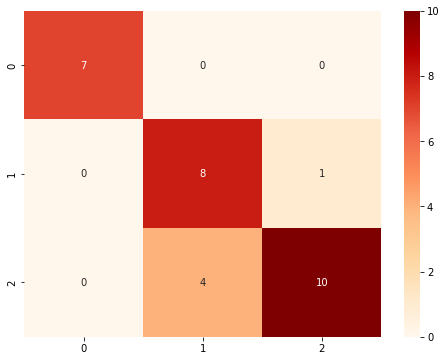

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:  0.8333333333333334


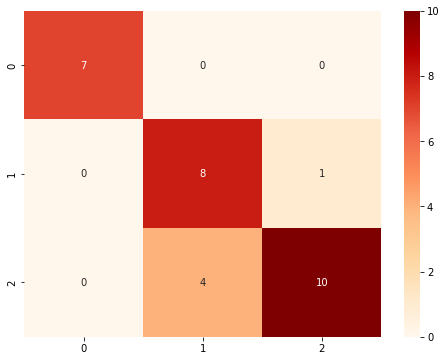

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:  0.8333333333333334


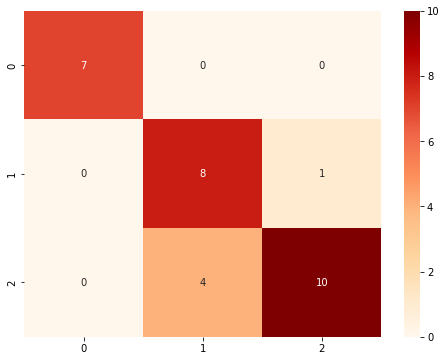

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:  0.23333333333333334


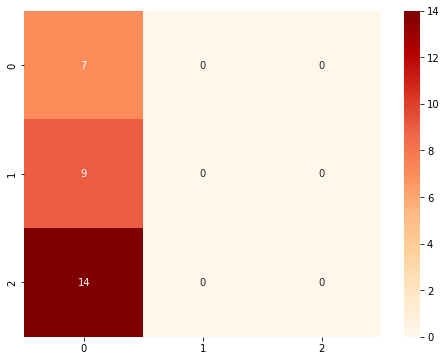

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

tb = widgets.TabBar(['poly', 'rbf', 'linear', 'sigmoid'])

for svm, tbb in zip(svm_list, tb):
  svm_pre = svm.predict(x_test.values)
  print('Accuracy: ', accuracy_score(y_test.values, svm_pre))
  res = confusion_matrix(y_test.values, svm_pre)
  fig = plt.figure(figsize=(8, 6))
  sn.heatmap(res, annot=True, cmap="OrRd", fmt='g')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

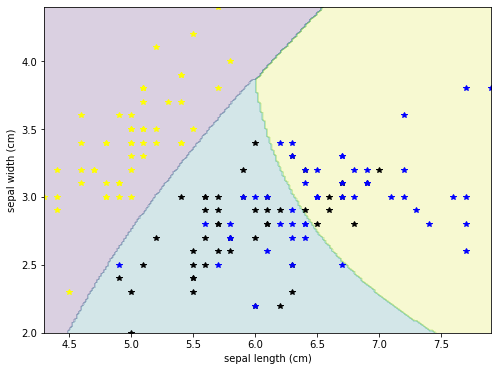

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

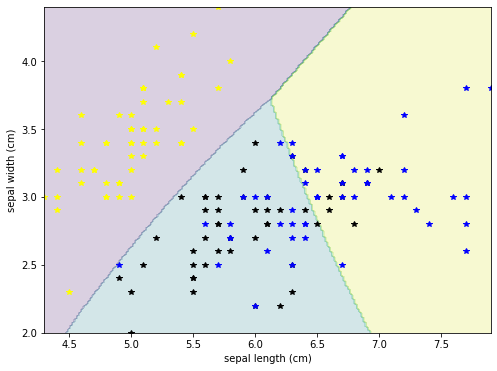

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

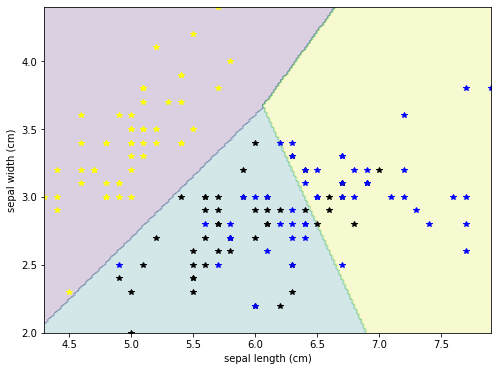

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

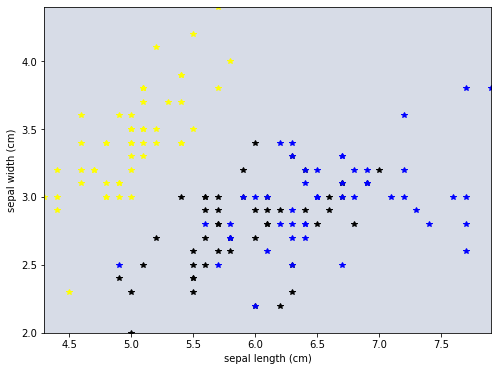

<IPython.core.display.Javascript object>

In [ ]:
x_train = np.array(inputs).reshape(-1, 2)

tb = widgets.TabBar(['poly', 'rbf', 'linear', 'sigmoid']) # 這行雖然上一個 cell 有寫了，但是一定要搬進來這才有用

for counter, svm in enumerate(svm_list):
  with tb.output_to(counter):
    fig = plt.figure(figsize=(8, 6))
    # prepare for contour，先畫地板
    resolution = 200
    dx = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), resolution) 
    dy = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), resolution)
    dx, dy = np.meshgrid(dx, dy)

    # merge dx, dy to test_x，預測地板類別
    test_x = np.c_[dx.flatten(), dy.flatten()]
    z = svm.predict(test_x)
    z = z.reshape(dx.shape)

    # draw，畫有類別的地板
    plt.contourf(dx, dy, z, alpha=0.2)

    # draw all dataset，畫整個資料集
    colors = ['#FF0', '#000', '#00F']
    for i in [0, 1, 2]:
        idx = labels == i
        plt.plot(x_train[idx, 0], x_train[idx, 1], '*', color=colors[i])
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy-poly:  1.0


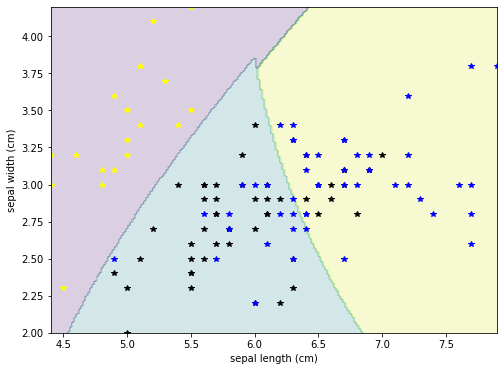

Accuracy-rbf:  1.0


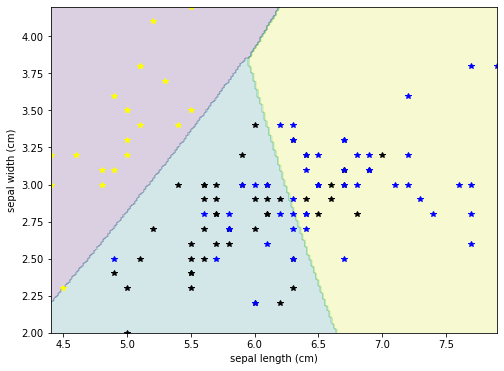

Accuracy-linear:  1.0


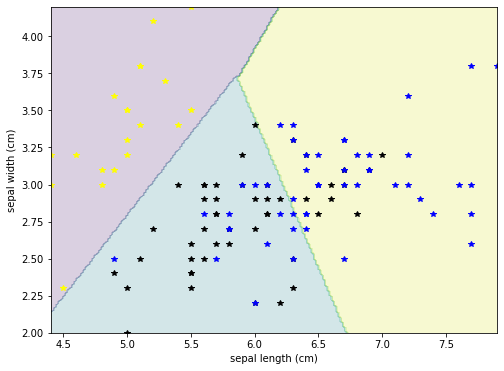

Accuracy-sigmoid:  0.0


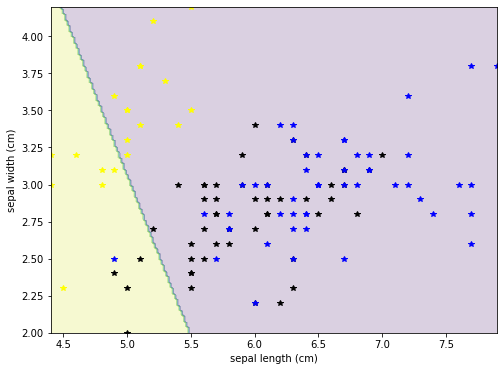

avg acc:  0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy-poly:  0.8


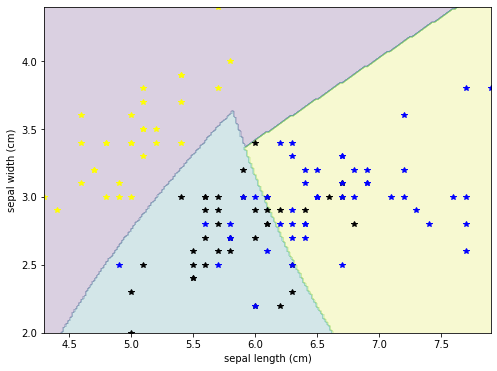

Accuracy-rbf:  0.8


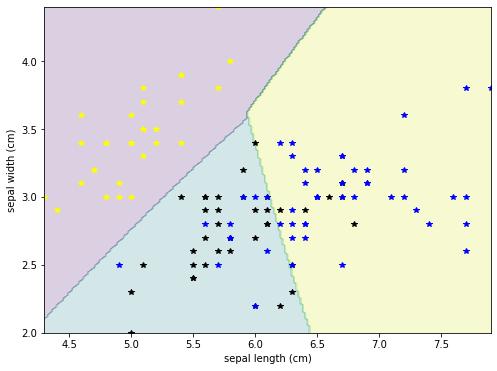

Accuracy-linear:  0.8


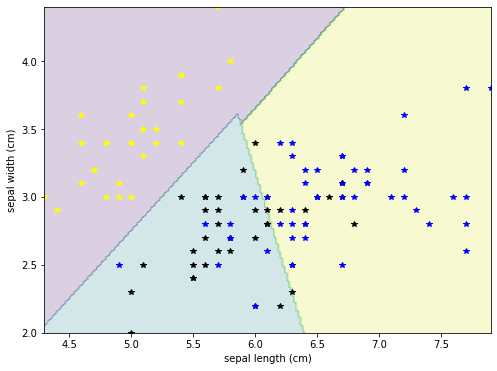

Accuracy-sigmoid:  0.0


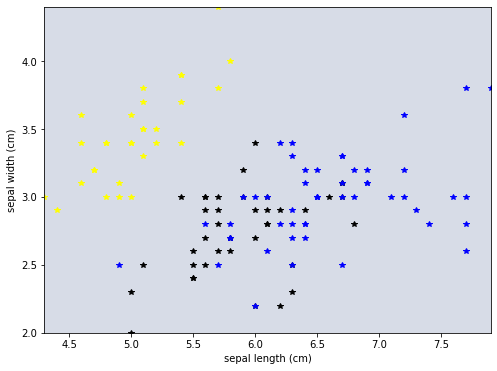

avg acc:  0.6749999999999999


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy-poly:  0.3333333333333333


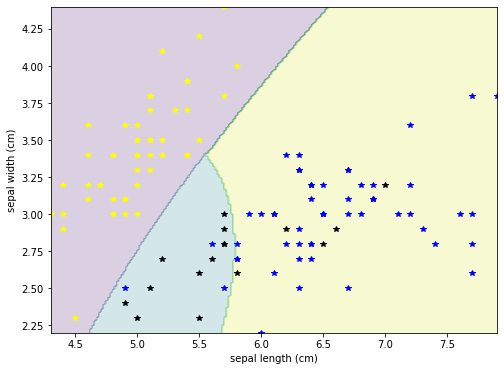

Accuracy-rbf:  0.2


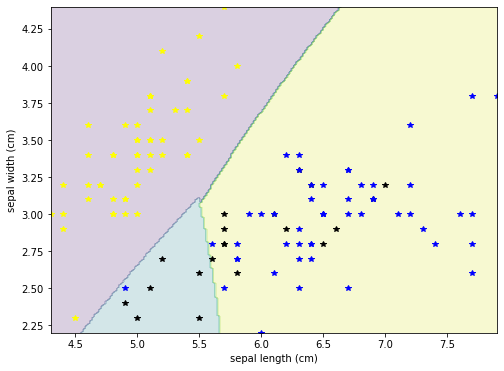

Accuracy-linear:  0.3


In [ ]:
from google.colab import widgets
data = load_iris()

inputs = data.data[:,[0,1]]
labels = data.target

n_split = 5
acc_list = []
counter = 0

tb = widgets.TabBar(['1 Fold', '2 Fold', '3 Fold', '4 Fold', '5 Fold'])

for train_index, test_index in KFold(n_split).split(inputs): # 每一次的 for，Kold 會幫你切好該次用於訓練和驗證的 Fold
  with tb.output_to(counter):
    # 準備此次的資料
    x_train, x_test = inputs[train_index], inputs[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # 使用此次訓練資料訓練
    svm_list = []
    for index, svm in enumerate(['poly','rbf','linear','sigmoid']):
      svm_clf = SVC(kernel=svm)
      svm_clf.fit(x_train, y_train)
      svm_list.append(svm_clf)
      svm_pre = svm_clf.predict(x_test)
      print(f"Accuracy-{svm}: ", accuracy_score(y_test, svm_pre))
      acc_list.append(accuracy_score(y_test, svm_pre))

      # 畫圖
      fig = plt.figure(figsize=(8, 6))
      resolution = 200
      dx = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), resolution) 
      dy = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), resolution)
      dx, dy = np.meshgrid(dx, dy)

      # merge dx, dy to test_x，預測地板類別
      test_x = np.c_[dx.flatten(), dy.flatten()]
      z = svm_clf.predict(test_x)
      z = z.reshape(dx.shape)

      # draw，畫有類別的地板
      plt.contourf(dx, dy, z, alpha=0.2)

      # draw all dataset，畫整個資料集
      colors = ['#FF0', '#000', '#00F']
      for index in [0,1,2]:
        idx = y_train == index
        plt.plot(x_train[idx, 0], x_train[idx, 1],'*', color=colors[index])
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
      plt.show()
    print('avg acc: ', sum(acc_list)/len(acc_list))
    counter = counter + 1